## CAR-INSURANCE-CLAIM-PREDICTION



Predict whether the policyholder will file a claim in the next 6 months or not.





## Problem Statement



CarIns is a startup that provides insurance for cars. It is one of the best car insurance brands known for the highest claim settlement ratio. It was launched back in Oct 2020 and acquired its initial policyholders by providing a hassle-free claim process, instant policy issuance, and claim settlements at minimum coverages.


As it's a fast growing startup, **the company would like to optimize the cost of the insurance by identifying the policyholders who are more likely to claim in the next 6 months.**

Now the company would like to use Data Science to identify the policyholders whose chances of filing a claim are high in the next 6 months. The company challenges the Data Science community to build a high-performance algorithm to predict if the policyholder will file a claim in the next 6 months or not based on the set of car and policy features.

In [1]:
## Importing Necessary libraries

import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings('ignore')


import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split


In [2]:
## Read the csv file of train set

train = pd.read_csv(r"C:\Users\HP\Downloads\train_qWM28Yl.csv")

In [3]:
## Top five observations
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
## Read the csv file of test set
test = pd.read_csv(r"C:\Users\HP\Downloads\test_zo1G9sv.csv")

In [5]:
## Top five observations
test.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0


In [6]:
## Merge the train and test dataset and named as data
data = pd.concat([train,test],ignore_index=True)

In [7]:
data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0.0


In [8]:
## shape of train and test
train.shape,test.shape,data.shape

((58592, 44), (39063, 43), (97655, 44))

In [11]:
## Five point summary of the data
data.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,97655.000000,97655.000000,97655.000000,97655.00000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,58592.000000
mean,0.611269,0.069508,0.469287,18822.60809,1.763586,3.138109,1161.655829,3.624423,5.245579,4.853024,3850.017715,1672.050187,1553.214500,1384.966750,1.759664,0.063968
std,0.414494,0.056774,0.122560,17656.79257,1.135832,1.831993,266.560176,0.484274,0.430432,0.228059,311.745860,112.042508,79.385788,212.543007,1.388415,0.244698
min,0.002735,0.000000,0.288462,290.00000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.000000,1051.000000,0.000000,0.000000
25%,0.209729,0.020000,0.375000,6112.00000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.000000,1185.000000,0.000000,0.000000
50%,0.573891,0.060000,0.451923,8794.00000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.000000,1335.000000,2.000000,0.000000
75%,1.039740,0.110000,0.548077,27003.00000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.000000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.00000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.000000,1720.000000,5.000000,1.000000


In [12]:
data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0.0


## Univariate Analysis

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97655 entries, 0 to 97654
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         97655 non-null  object 
 1   policy_tenure                     97655 non-null  float64
 2   age_of_car                        97655 non-null  float64
 3   age_of_policyholder               97655 non-null  float64
 4   area_cluster                      97655 non-null  object 
 5   population_density                97655 non-null  int64  
 6   make                              97655 non-null  int64  
 7   segment                           97655 non-null  object 
 8   model                             97655 non-null  object 
 9   fuel_type                         97655 non-null  object 
 10  max_torque                        97655 non-null  object 
 11  max_power                         97655 non-null  object 
 12  engi

In [14]:
## numeric columns
num_cols = data.select_dtypes(include = np.number).columns

In [15]:
num_cols

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')

In [16]:
## Categorical Columns
cat_cols = data.select_dtypes(include = np.object).columns

In [17]:
cat_cols

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

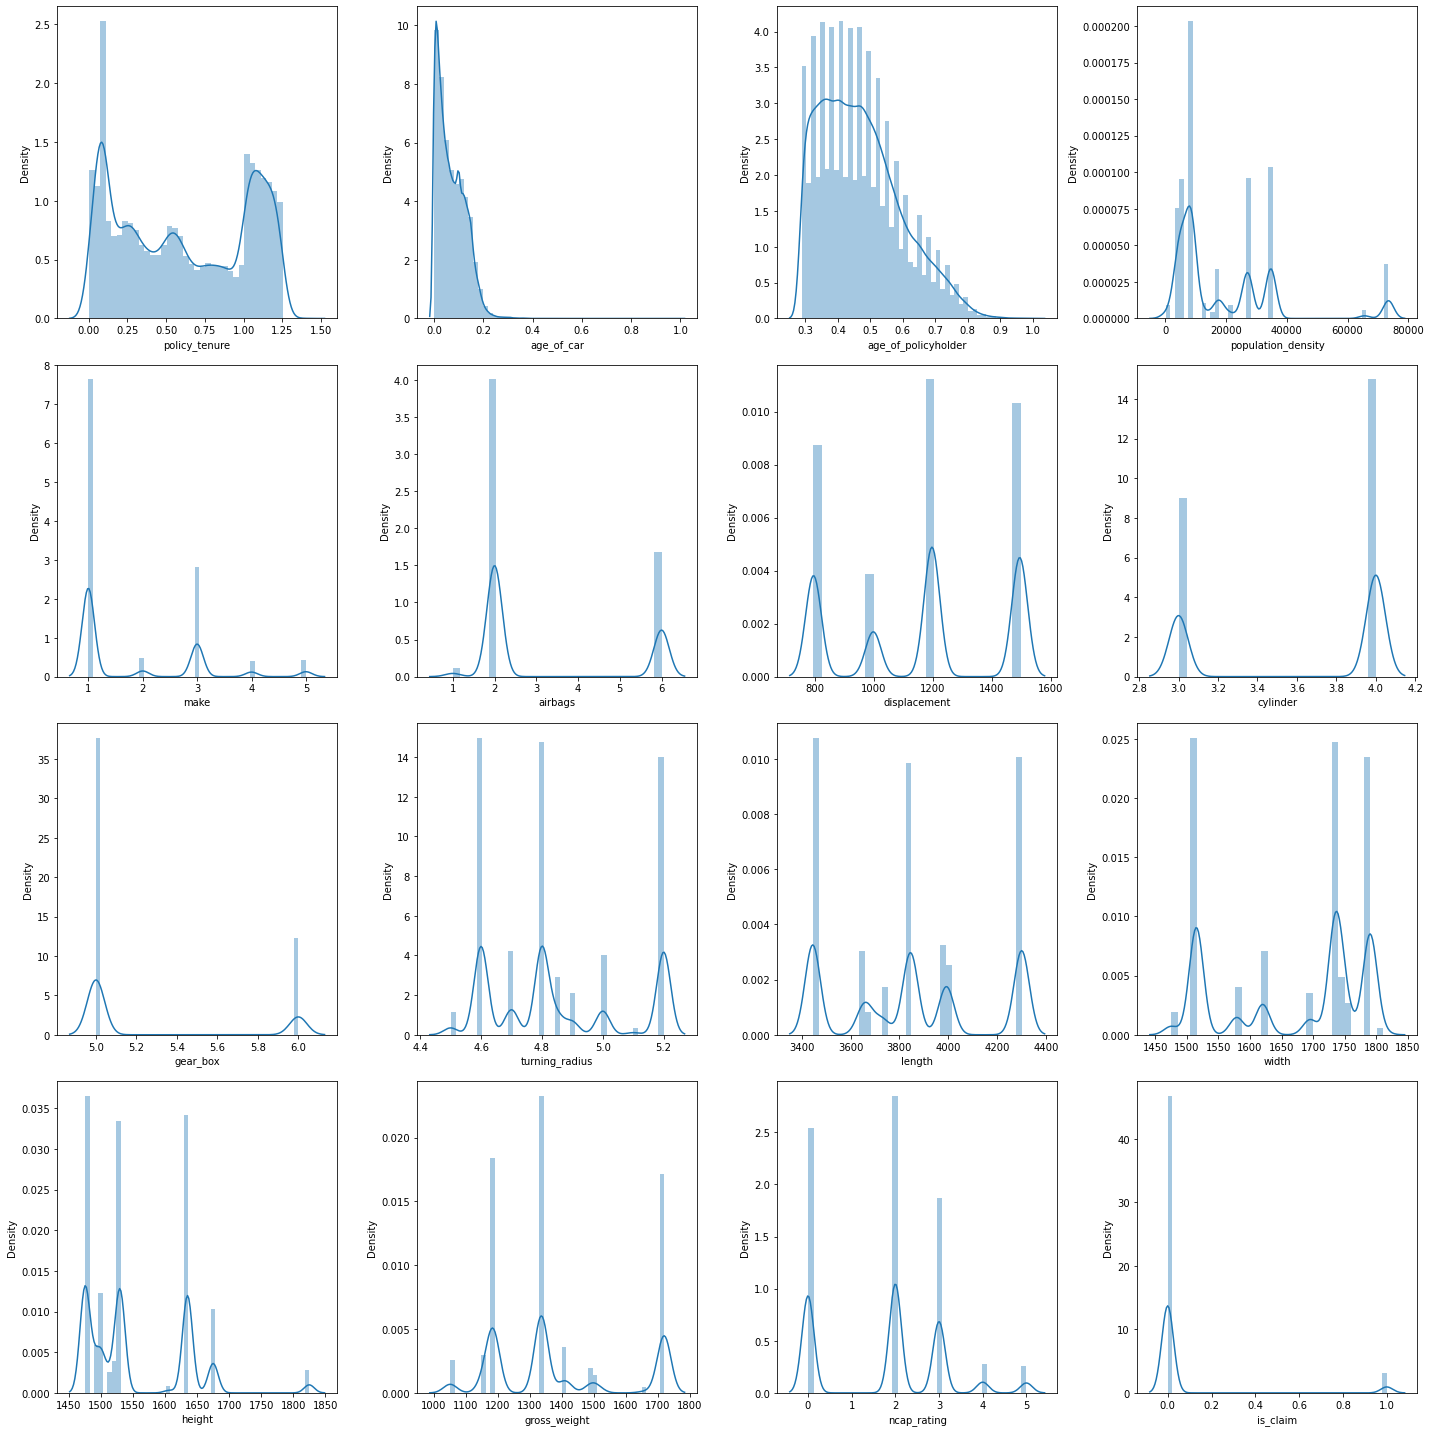

In [20]:
### Visualization of numerical columns

### Distribution plot such as histograms or kernel density plots, provide visual representations of the distribution
### of a dataset. They offer insights into the central tendency, spread, skewness, and other characteristics of the data.

plt.figure(figsize=(20,20))

nrows = 4
ncols = 4

t=1

for i in num_cols:
    plt.subplot(nrows,ncols,t)
    sns.distplot(data.loc[:,i])
    t=t+1
    
plt.tight_layout()
plt.show()

In [17]:
### Visualization of Categorical Columns
### Count plot is a type of categorical plot that shows the count of occurrences of each category in a dataset.
### Here are some inferences we can make from a count plot:Frequency of Categories,
###                                                        imbalance,
###                                                        Rare or uncommon categories,
###                                                        comparison between categories.

cat_vars = ['area_cluster', 'segment', 'model', 'fuel_type','engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert']

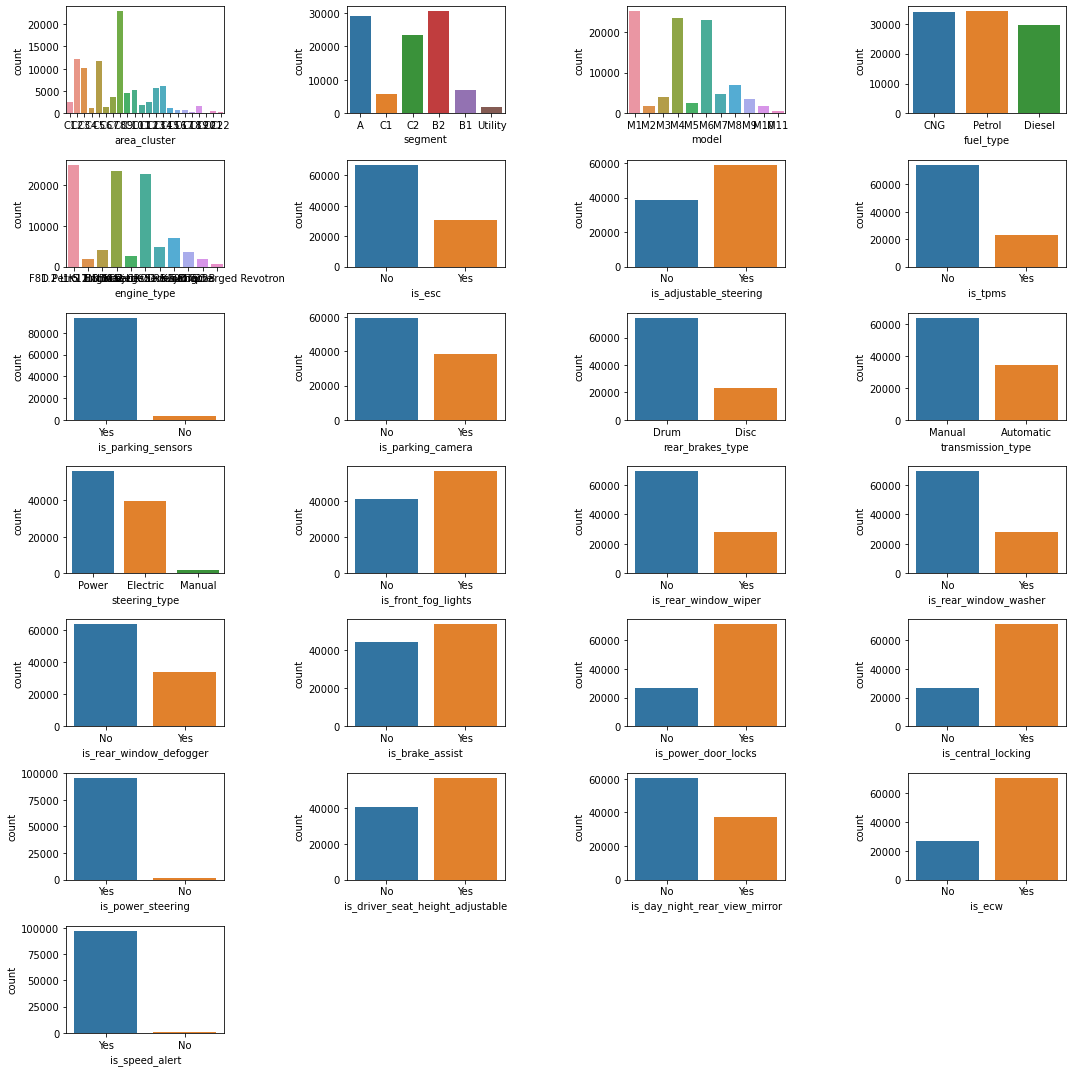

In [18]:
plt.figure(figsize=(15,15))



nrows = 7
ncols = 4

t=1

for i in cat_vars:
    plt.subplot(nrows,ncols,t)
    sns.countplot(data.loc[:,i])
    t=t+1
    
plt.tight_layout()
plt.show()

## Bivariate Analysis

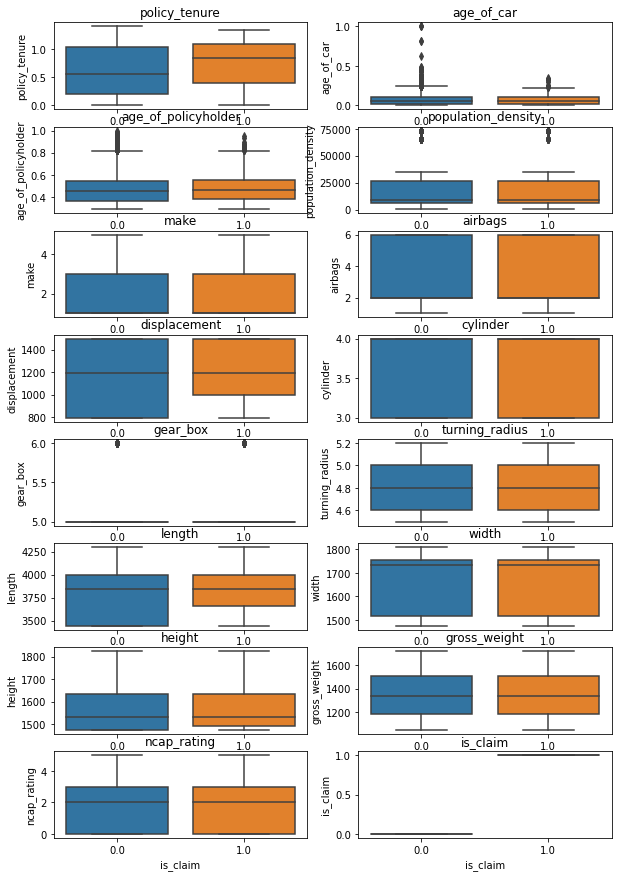

In [19]:
### numeric  vs Category (Target)
### boxplot


plt.figure(figsize=(10,15))

t=1
for i in num_cols:
    plt.subplot(8,2,t)
    sns.boxplot(data.is_claim,data.loc[:,i])
    plt.title(i)
    t=t+1
    
##plt.tightlayout()    
plt.show()

## Statistical approach for feature selection

In [125]:
### Apply the statistical test 

# two sample t-Test
# Ho: Variables have no effect on the target.
# Ha: Variables have effect on  the target.





imp_feats = []
import scipy.stats as stats

for i in num_cols:
    zero = data.loc[data.is_claim==0,i]
    one = data.loc[data.is_claim==1,i]
    teststats, pvalue = stats.ttest_ind(zero,one)
    
    if pvalue<0.05:
        imp_feats.append(i)
print(imp_feats)        
        

['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'cylinder', 'width', 'is_claim']


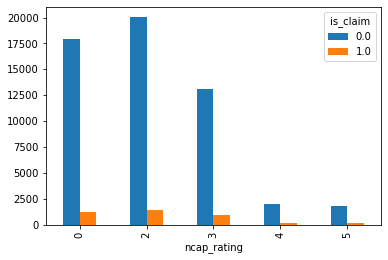

In [20]:
## ncap rating vs target

pd.crosstab(data.ncap_rating,data.is_claim).plot(kind='bar')
plt.show()    


### We can infer that the cars that have the lowest ncap rating are more  prone to the claims

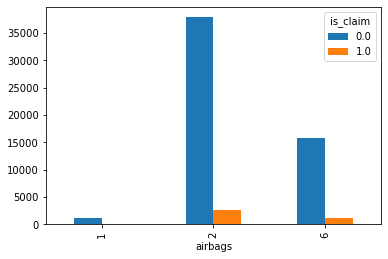

In [21]:
## airbags vs target

pd.crosstab(data.airbags,data.is_claim).plot(kind='bar')
plt.show()  

In [23]:
cat_feats = []
import scipy.stats as stats

for i in cat_vars:
    tbl = pd.crosstab(data.loc[:,i],data.is_claim)
    
    teststats, pvalue, dof, exp_freq = stats.chi2_contingency(tbl)
    
    if pvalue<0.05:
        cat_feats.append(i)
print(cat_feats)        
        


['area_cluster', 'segment', 'model', 'engine_type', 'is_adjustable_steering', 'is_parking_sensors', 'is_front_fog_lights', 'is_brake_assist', 'is_driver_seat_height_adjustable']


### Feature Engineering

In [25]:
data.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0


In [26]:
data[['Nm_torque','rpm_Torque']] = data.max_torque.str.split('@',expand=True)

In [27]:
data[['hp','rpm_power']] = data.max_power.str.split('@',expand=True)

In [28]:
data.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_Torque,hp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60Nm,3500rpm,40.36bhp,6000rpm
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60Nm,3500rpm,40.36bhp,6000rpm


In [29]:
data.engine_type.unique()

array(['F8D Petrol Engine', '1.2 L K12N Dualjet', '1.0 SCe',
       '1.5 L U2 CRDi', '1.5 Turbocharged Revotorq', 'K Series Dual jet',
       '1.2 L K Series Engine', 'K10C', 'i-DTEC', 'G12B',
       '1.5 Turbocharged Revotron'], dtype=object)

In [30]:
data['Nm_torque'] = data.Nm_torque.apply(lambda x:float(x[:-2]))
data['rpm_Torque'] = data.rpm_Torque.apply(lambda x:float(x[:-3]))
data['hp'] = data.hp.apply(lambda x:float(x[:-3]))
data['rpm_power'] = data.rpm_power.apply(lambda x:float(x[:-3]))

In [31]:
data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_Torque,hp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60.0,3500.0,40.36,6000.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60.0,3500.0,40.36,6000.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60.0,3500.0,40.36,6000.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0.0,113.0,4400.0,88.50,6000.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0.0,91.0,4250.0,67.06,5500.0


In [32]:
for i in cat_vars:
    if i.startswith('is')&(i!='is_claim'):
        mapp = {'Yes':1,'No':0}
        data[i] = data[i].map(mapp)

In [33]:
data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_Torque,hp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0.0,113.0,4400.0,88.50,6000.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0.0,91.0,4250.0,67.06,5500.0


In [34]:
# per unit torque...............
data['per_unit_torque'] = data.rpm_Torque/data.Nm_torque
data['per_unit_power'] = data.rpm_power/data.hp

In [35]:
data['age_prop'] = data.age_of_car/data.age_of_policyholder

In [36]:
data.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_Torque,hp,rpm_power,per_unit_torque,per_unit_power,age_prop
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333


In [37]:
data['magic1'] = data.groupby('area_cluster')['policy_id'].transform('nunique')

In [38]:
### statistical test

zero = data.loc[data.is_claim==0,'magic1']
one = data.loc[data.is_claim==1,'magic1']
stats.ttest_ind(zero,one)

Ttest_indResult(statistic=-4.251501393229284, pvalue=2.1267052931968418e-05)

In [39]:
#### count of policies in magic1/pop Density

data['magic2'] = data.magic1/data.population_density

In [40]:
### statistical test

zero = data.loc[data.is_claim==0,'magic2']
one = data.loc[data.is_claim==1,'magic2']
stats.ttest_ind(zero,one)

Ttest_indResult(statistic=-3.7411060267064706, pvalue=0.00018338678692374335)

In [41]:
data.groupby('area_cluster')['policy_tenure'].describe()


,count,mean,std,min,25%,50%,75%,max
area_cluster,,,,,,,,
C1,2473.0,0.471300,0.366571,0.002838,0.108136,0.396802,0.755120,1.342422
C10,5273.0,0.470870,0.373193,0.002748,0.099477,0.392733,0.746006,1.375988
C11,1914.0,0.736641,0.413930,0.002745,0.331071,0.866039,1.102085,1.249735
C12,2656.0,0.681769,0.420269,0.002813,0.274734,0.739837,1.079275,1.249619
C13,5618.0,0.654417,0.423679,0.002746,0.238277,0.659494,1.071841,1.321938
C14,6215.0,0.766214,0.405827,0.002735,0.385193,0.961876,1.114543,1.285696
C15,1288.0,0.422039,0.391575,0.002773,0.089827,0.259861,0.702430,1.310089
C16,676.0,0.466288,0.329262,0.002979,0.164387,0.433101,0.746692,1.240584
C17,788.0,0.510888,0.367828,0.002769,0.191428,0.454307,0.813221,1.249618


In [42]:
data['magic3'] = data.groupby('area_cluster')['policy_tenure'].transform('min')
data['magic4'] = data.groupby('area_cluster')['policy_tenure'].transform('max')
data['magic5'] = data.groupby('area_cluster')['policy_tenure'].transform('mean')
data['magic6'] = data.groupby('area_cluster')['policy_tenure'].transform('median')

In [43]:
data.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_Torque,hp,rpm_power,per_unit_torque,per_unit_power,age_prop,magic1,magic2,magic3,magic4,magic5,magic6
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612,2473,0.495591,0.002838,1.342422,0.471300,0.396802
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333,12158,0.450246,0.002739,1.370463,0.609815,0.572343


In [44]:
## statistical Test on the Created features


list_feat = ['magic1','magic2','magic3','magic4','magic5','magic6']

for i in list_feat:
    zero = data.loc[data.is_claim==0,i]
    one = data.loc[data.is_claim==1,i]
    teststats,pvalue = stats.ttest_ind(zero,one)
    print('Pvalue: ',i,pvalue)
    
    
### magic4 is not a good feature    

Pvalue:  magic1 2.1267052931968418e-05
Pvalue:  magic2 0.00018338678692374335
Pvalue:  magic3 0.01517380140799255
Pvalue:  magic4 0.1896759377985605
Pvalue:  magic5 2.5550496912611606e-07
Pvalue:  magic6 2.463473664106657e-07


In [45]:
data.transmission_type.unique()

array(['Manual', 'Automatic'], dtype=object)

In [46]:
pd.crosstab(data.engine_type,data.is_claim)

is_claim,0.0,1.0
engine_type,,
1.0 SCe,2245,128
1.2 L K Series Engine,2739,201
1.2 L K12N Dualjet,1000,80
1.5 L U2 CRDi,13117,901
1.5 Turbocharged Revotorq,1482,116
1.5 Turbocharged Revotron,348,15
F8D Petrol Engine,14030,918
G12B,1136,73
K Series Dual jet,12837,939


<AxesSubplot:xlabel='is_claim'>

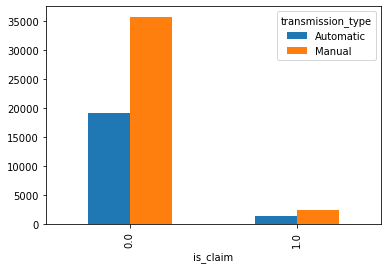

In [47]:
pd.crosstab(data.is_claim,data.transmission_type).plot(kind='bar')

In [48]:
data['transmission_type'] = np.where(data.transmission_type=='Manual',1,0)

In [49]:
data.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_Torque,hp,rpm_power,per_unit_torque,per_unit_power,age_prop,magic1,magic2,magic3,magic4,magic5,magic6
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612,2473,0.495591,0.002838,1.342422,0.471300,0.396802
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333,12158,0.450246,0.002739,1.370463,0.609815,0.572343


<AxesSubplot:xlabel='is_claim'>

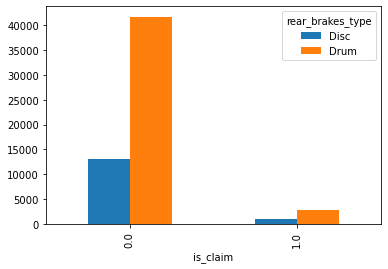

In [50]:
pd.crosstab(data.is_claim,data.rear_brakes_type).plot(kind='bar')

In [51]:
data['rear_brakes_type'] = np.where(data.rear_brakes_type=='Drum',1,0)

<AxesSubplot:xlabel='is_claim'>

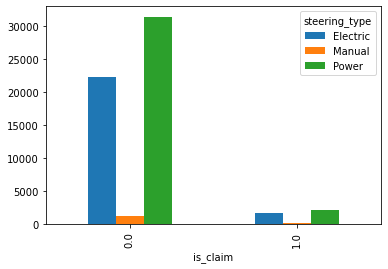

In [52]:
pd.crosstab(data.is_claim,data.steering_type).plot(kind='bar')

In [53]:
!pip install category_encoders


In [54]:
data.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_Torque,hp,rpm_power,per_unit_torque,per_unit_power,age_prop,magic1,magic2,magic3,magic4,magic5,magic6
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612,2473,0.495591,0.002838,1.342422,0.471300,0.396802
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333,12158,0.450246,0.002739,1.370463,0.609815,0.572343


In [55]:
data.drop(columns=['policy_id','max_torque','max_power','magic4'],inplace=True)

In [56]:
data.isnull().sum()

policy_tenure                           0
age_of_car                              0
age_of_policyholder                     0
area_cluster                            0
population_density                      0
make                                    0
segment                                 0
model                                   0
fuel_type                               0
engine_type                             0
airbags                                 0
is_esc                                  0
is_adjustable_steering                  0
is_tpms                                 0
is_parking_sensors                      0
is_parking_camera                       0
rear_brakes_type                        0
displacement                            0
cylinder                                0
transmission_type                       0
gear_box                                0
steering_type                           0
turning_radius                          0
length                            

In [57]:
data.loc[0:train.shape[0]-1,]

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_Torque,hp,rpm_power,per_unit_torque,per_unit_power,age_prop,magic1,magic2,magic3,magic5,magic6
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612,2473,0.495591,0.002838,0.471300,0.396802
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333,12158,0.450246,0.002739,0.609815,0.572343
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.052000,10172,2.495584,0.002753,0.493563,0.436682
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,1.2 L K12N Dualjet,2,1,1,0,1,1,1,1197,4,0,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0.0,113.0,4400.0,88.50,6000.0,38.938053,67.796610,0.254222,1112,0.051429,0.002773,0.509921,0.457736
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,1.0 SCe,2,0,0,0,0,1,1,999,3,0,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0.0,91.0,4250.0,67.06,5500.0,46.703297,82.016105,0.173333,11683,0.336318,0.002768,0.520588,0.487713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,1.0 SCe,2,0,0,0,0,1,1,999,3,0,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0.0,91.0,4250.0,67.06,5500.0,46.703297,82.016105,0.201791,22815,2.594383,0.002740,0.745384,0.898663
58588,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.038519,6215,0.798023,0.002735,0.766214,0.961876
58589,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.110638,11683,0.336318,0.002768,0.520588,0.487713
58590,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,K Series Dual jet,2,0,1,0,1,0,1,1197,4,1,5,Electric,4.8,3845,1735,1530,1335,1,0,0,0,1,1,1,1,1,1,1,1,2,0.0,113.0,4400.0,88.50,6000.0,38.938053,67.796610,0.251034,22815,2.594383,0.002740,0.745384,0.898663


In [179]:
# Split the data in train and test

newtrain = data.loc[0:train.shape[0]-1,]
newtest = data.loc[train.shape[0]:,]

In [180]:
train.shape,test.shape,newtrain.shape,newtest.shape

((58592, 44), (39063, 43), (58592, 53), (39063, 53))

In [181]:
#### drop the Target Varible from train  and test

X = newtrain.drop('is_claim',axis=1)
newtest = newtest.drop('is_claim',axis=1)
y = newtrain.is_claim

In [185]:
### Target Encoding

mycols = ['area_cluster','steering_type','engine_type','model','fuel_type','segment']


import category_encoders as ce

tgt =  ce.TargetEncoder(cols=mycols)



newx = tgt.fit_transform(X,y)


test_encoded = tgt.transform(newtest)

In [187]:
### Lets create unit_volume


newx['per_unit_vol'] = newx.gross_weight/(newx.length*newx.width*newx.height)
test_encoded['per_unit_vol'] = test_encoded.gross_weight/(test_encoded.length*test_encoded.width*test_encoded.height)

In [188]:
newx.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,Nm_torque,rpm_Torque,hp,rpm_power,per_unit_torque,per_unit_power,age_prop,magic1,magic2,magic3,magic5,magic6,per_unit_vol
0,0.515874,0.05,0.644231,0.051771,4990,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,1,796,3,1,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612,2473,0.495591,0.002838,0.471300,0.396802,1.539304e-07
1,0.672619,0.02,0.375000,0.070825,27003,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,1,796,3,1,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333,12158,0.450246,0.002739,0.609815,0.572343,1.539304e-07
2,0.841110,0.02,0.384615,0.070972,4076,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,1,796,3,1,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.052000,10172,2.495584,0.002753,0.493563,0.436682,1.539304e-07
3,0.900277,0.11,0.432692,0.076692,21622,1,0.064099,0.074074,0.066384,0.074074,2,1,1,0,1,1,1,1197,4,0,5,0.066873,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,113.0,4400.0,88.50,6000.0,38.938053,67.796610,0.254222,1112,0.051429,0.002773,0.509921,0.457736,1.271313e-07
4,0.596403,0.11,0.634615,0.057745,34738,2,0.060389,0.053940,0.066384,0.053940,2,0,0,0,0,1,1,999,3,0,5,0.066873,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,91.0,4250.0,67.06,5500.0,46.703297,82.016105,0.173333,11683,0.336318,0.002768,0.520588,0.487713,1.315795e-07


In [189]:
test_encoded.head(2)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,Nm_torque,rpm_Torque,hp,rpm_power,per_unit_torque,per_unit_power,age_prop,magic1,magic2,magic3,magic5,magic6,per_unit_vol
58592,0.341732,0.00,0.586538,0.070972,4076,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,1,796,3,1,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.000000,10172,2.495584,0.002753,0.493563,0.436682,1.539304e-07
58593,0.307241,0.13,0.442308,0.069870,8794,1,0.068581,0.068162,0.066384,0.068162,2,0,1,0,1,0,1,1197,4,1,5,0.066873,4.8,3845,1735,1530,1335,1,0,0,0,1,1,1,1,1,1,1,1,2,113.0,4400.0,88.50,6000.0,38.938053,67.796610,0.293913,22815,2.594383,0.002740,0.745384,0.898663,1.307959e-07


In [190]:
### Scaled the dataset
scale = ['policy_tenure','population_density','displacement','length','width','height','gross_weight','Nm_torque','rpm_Torque','hp','rpm_power','per_unit_torque','per_unit_power',
        'magic1','magic3','magic5','magic6']

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
for i in scale:
    newx.loc[:,i] = sc.fit_transform(pd.DataFrame(newx.loc[:,i]))
    test_encoded.loc[:,i] = sc.fit_transform(pd.DataFrame(test_encoded.loc[:,i]))

In [191]:
newx.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,Nm_torque,rpm_Torque,hp,rpm_power,per_unit_torque,per_unit_power,age_prop,magic1,magic2,magic3,magic5,magic6,per_unit_vol
0,-0.230283,0.05,0.644231,0.051771,-0.783513,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,1,-1.375713,3,1,5,0.062026,4.6,-1.301882,-1.402768,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,0,-1.017838,-0.045700,-1.394156,0.755743,1.249354,1.551491,0.077612,-1.130808,0.495591,2.360294,-1.260362,-1.138870,1.539304e-07
1,0.148188,0.02,0.375000,0.070825,0.462975,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,1,-1.375713,3,1,5,0.062026,4.6,-1.301882,-1.402768,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,0,-1.017838,-0.045700,-1.394156,0.755743,1.249354,1.551491,0.053333,0.167697,0.450246,-0.564288,-0.013764,-0.296516,1.539304e-07
2,0.555022,0.02,0.384615,0.070972,-0.835268,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,1,-1.375713,3,1,5,0.062026,4.6,-1.301882,-1.402768,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,0,-1.017838,-0.045700,-1.394156,0.755743,1.249354,1.551491,0.052000,-0.098573,2.495584,-0.152871,-1.059999,-0.947499,1.539304e-07
3,0.697883,0.11,0.432692,0.076692,0.158275,1,0.064099,0.074074,0.066384,0.074074,2,1,1,0,1,1,1,0.130093,4,0,5,0.066873,4.8,0.464026,0.559973,-0.481470,-0.236684,1,0,0,1,1,1,1,1,1,1,1,1,2,-0.293261,1.194047,0.343811,0.755743,0.174937,-0.327091,0.254222,-1.313282,0.051429,0.436898,-0.912788,-0.846469,1.271313e-07
4,-0.035840,0.11,0.634615,0.057745,0.900969,2,0.060389,0.053940,0.066384,0.053940,2,0,0,0,0,1,1,-0.613422,3,0,5,0.066873,5.0,-0.383610,-0.831789,-0.795455,-1.084057,0,0,0,0,0,1,1,1,0,1,1,1,2,-0.594029,0.987423,-0.430223,0.210345,0.605099,0.003241,0.173333,0.104012,0.336318,0.298070,-0.816790,-0.702623,1.315795e-07


## Building Machine learning models

In [192]:
from sklearn.ensemble import RandomForestClassifier

In [193]:
rf = RandomForestClassifier(criterion='entropy')
model_rf = rf.fit(newx,y)

In [194]:
y_pred_rf = model_rf.predict(test_encoded)

In [195]:
submission = pd.read_csv(r"C:\Users\HP\Downloads\sample_submission_KvRh9Sx.csv")

In [197]:
submission['is_claim']  = y_pred_rf 

In [202]:
submission.to_csv('firstModel.csv',index=False)

In [203]:
cd

C:\Users\HP


In [204]:
## Apply Smote

from imblearn.over_sampling import SMOTE
smote = SMOTE()


In [205]:
smotex,smotey = smote.fit_resample(newx,y)

In [212]:
rf = RandomForestClassifier(criterion='entropy')
model_rf = rf.fit(smotex,smotey)

In [213]:
y_pred_rf_s = model_rf.predict(test_encoded)

In [214]:
submission['is_claim']  = y_pred_rf_s

In [215]:
submission.to_csv('firstModel_after.csv',index=False)

In [216]:
cd

C:\Users\HP


In [218]:
!pip install lightgbm


In [219]:
!pip install catboost

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [221]:
## define the Base model


def base_models():
    models = dict()
    models['lg'] = LogisticRegression()
    models['rf'] = RandomForestClassifier()
    models['ada'] = AdaBoostClassifier()
    models['gbm'] = GradientBoostingClassifier()
    models['xgb'] = XGBClassifier()
    models['naivebayes'] = GaussianNB()
    models['lgbm'] = LGBMClassifier()
    models['catboost'] = CatBoostClassifier()
    return models

In [223]:
from sklearn.model_selection import cross_val_score,StratifiedKFold

def eval_score(model):
    cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    score = cross_val_score(model,smotex,smotey,scoring='f1',cv=cv,error_score='raise',n_jobs=-1)
    return score

In [227]:
## Built the Models
models = base_models()


result,names = list(),list()
for name, model in models.items():
    finalscore = eval_score(model)
    result.append(finalscore)
    names.append(name)
    print('%s %.3f (%.3f)'% (name,np.mean(result),np.std(result)))

lg 0.588 (0.004)
rf 0.747 (0.159)
ada 0.739 (0.130)
gbm 0.776 (0.130)
xgb 0.813 (0.138)
naivebayes 0.775 (0.151)
lgbm 0.800 (0.153)
catboost 0.820 (0.153)


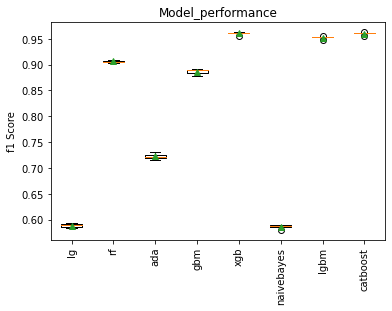

In [228]:
plt.boxplot(result, labels=names, showmeans=True)
plt.xticks(rotation = 90)
plt.ylabel('f1 Score')
plt.title('Model_performance')
plt.show()

In [229]:
### Final models are XGB, LBGM, CATBOOST

In [230]:
from sklearn.ensemble import StackingClassifier

In [232]:
base = [('xgb',XGBClassifier()),('lgbm',LGBMClassifier())]

cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
stack = StackingClassifier(estimators=base,final_estimator=CatBoostClassifier(),cv=cv)

In [233]:
pred_stack = stack.fit(smotex,smotey).predict(test_encoded)

Learning rate set to 0.076574
0:	learn: 0.5259101	total: 173ms	remaining: 2m 52s
1:	learn: 0.4039798	total: 195ms	remaining: 1m 37s
2:	learn: 0.3513250	total: 209ms	remaining: 1m 9s
3:	learn: 0.2916232	total: 225ms	remaining: 56.1s
4:	learn: 0.2492388	total: 239ms	remaining: 47.5s
5:	learn: 0.2231461	total: 251ms	remaining: 41.6s
6:	learn: 0.2027970	total: 263ms	remaining: 37.2s
7:	learn: 0.1881818	total: 275ms	remaining: 34.1s
8:	learn: 0.1775933	total: 287ms	remaining: 31.6s
9:	learn: 0.1682639	total: 299ms	remaining: 29.6s
10:	learn: 0.1601317	total: 311ms	remaining: 28s
11:	learn: 0.1550397	total: 323ms	remaining: 26.6s
12:	learn: 0.1501951	total: 335ms	remaining: 25.4s
13:	learn: 0.1464133	total: 347ms	remaining: 24.4s
14:	learn: 0.1435917	total: 359ms	remaining: 23.6s
15:	learn: 0.1412798	total: 371ms	remaining: 22.8s
16:	learn: 0.1388455	total: 384ms	remaining: 22.2s
17:	learn: 0.1372000	total: 399ms	remaining: 21.8s
18:	learn: 0.1358736	total: 415ms	remaining: 21.4s
19:	learn: 

169:	learn: 0.1259589	total: 2.7s	remaining: 13.2s
170:	learn: 0.1259493	total: 2.74s	remaining: 13.3s
171:	learn: 0.1259494	total: 2.76s	remaining: 13.3s
172:	learn: 0.1259320	total: 2.78s	remaining: 13.3s
173:	learn: 0.1259230	total: 2.81s	remaining: 13.3s
174:	learn: 0.1259121	total: 2.83s	remaining: 13.3s
175:	learn: 0.1258959	total: 2.85s	remaining: 13.3s
176:	learn: 0.1258820	total: 2.87s	remaining: 13.3s
177:	learn: 0.1258750	total: 2.88s	remaining: 13.3s
178:	learn: 0.1258691	total: 2.9s	remaining: 13.3s
179:	learn: 0.1258582	total: 2.92s	remaining: 13.3s
180:	learn: 0.1258356	total: 2.94s	remaining: 13.3s
181:	learn: 0.1258217	total: 2.95s	remaining: 13.3s
182:	learn: 0.1258073	total: 2.97s	remaining: 13.3s
183:	learn: 0.1257963	total: 2.98s	remaining: 13.2s
184:	learn: 0.1257857	total: 3s	remaining: 13.2s
185:	learn: 0.1257835	total: 3.01s	remaining: 13.2s
186:	learn: 0.1257670	total: 3.03s	remaining: 13.2s
187:	learn: 0.1257470	total: 3.04s	remaining: 13.1s
188:	learn: 0.125

331:	learn: 0.1243172	total: 5.61s	remaining: 11.3s
332:	learn: 0.1243101	total: 5.63s	remaining: 11.3s
333:	learn: 0.1243012	total: 5.65s	remaining: 11.3s
334:	learn: 0.1242932	total: 5.67s	remaining: 11.3s
335:	learn: 0.1242846	total: 5.69s	remaining: 11.2s
336:	learn: 0.1242809	total: 5.7s	remaining: 11.2s
337:	learn: 0.1242711	total: 5.72s	remaining: 11.2s
338:	learn: 0.1242592	total: 5.74s	remaining: 11.2s
339:	learn: 0.1242497	total: 5.75s	remaining: 11.2s
340:	learn: 0.1242460	total: 5.77s	remaining: 11.2s
341:	learn: 0.1242331	total: 5.79s	remaining: 11.1s
342:	learn: 0.1242259	total: 5.8s	remaining: 11.1s
343:	learn: 0.1242145	total: 5.82s	remaining: 11.1s
344:	learn: 0.1241986	total: 5.84s	remaining: 11.1s
345:	learn: 0.1241945	total: 5.86s	remaining: 11.1s
346:	learn: 0.1241888	total: 5.88s	remaining: 11.1s
347:	learn: 0.1241778	total: 5.9s	remaining: 11s
348:	learn: 0.1241697	total: 5.92s	remaining: 11s
349:	learn: 0.1241539	total: 5.93s	remaining: 11s
350:	learn: 0.1241453

499:	learn: 0.1229168	total: 8.71s	remaining: 8.71s
500:	learn: 0.1229078	total: 8.73s	remaining: 8.69s
501:	learn: 0.1229039	total: 8.75s	remaining: 8.68s
502:	learn: 0.1228970	total: 8.76s	remaining: 8.66s
503:	learn: 0.1228929	total: 8.78s	remaining: 8.64s
504:	learn: 0.1228866	total: 8.8s	remaining: 8.63s
505:	learn: 0.1228778	total: 8.82s	remaining: 8.61s
506:	learn: 0.1228702	total: 8.84s	remaining: 8.6s
507:	learn: 0.1228594	total: 8.86s	remaining: 8.58s
508:	learn: 0.1228529	total: 8.88s	remaining: 8.56s
509:	learn: 0.1228477	total: 8.9s	remaining: 8.55s
510:	learn: 0.1228372	total: 8.92s	remaining: 8.53s
511:	learn: 0.1228257	total: 8.94s	remaining: 8.52s
512:	learn: 0.1228145	total: 8.96s	remaining: 8.51s
513:	learn: 0.1228018	total: 8.98s	remaining: 8.49s
514:	learn: 0.1227944	total: 9s	remaining: 8.47s
515:	learn: 0.1227916	total: 9.01s	remaining: 8.46s
516:	learn: 0.1227844	total: 9.03s	remaining: 8.44s
517:	learn: 0.1227726	total: 9.05s	remaining: 8.42s
518:	learn: 0.1227

665:	learn: 0.1218178	total: 11.6s	remaining: 5.8s
666:	learn: 0.1218056	total: 11.6s	remaining: 5.79s
667:	learn: 0.1217988	total: 11.6s	remaining: 5.77s
668:	learn: 0.1217930	total: 11.6s	remaining: 5.75s
669:	learn: 0.1217871	total: 11.7s	remaining: 5.74s
670:	learn: 0.1217768	total: 11.7s	remaining: 5.72s
671:	learn: 0.1217768	total: 11.7s	remaining: 5.7s
672:	learn: 0.1217735	total: 11.7s	remaining: 5.69s
673:	learn: 0.1217687	total: 11.7s	remaining: 5.67s
674:	learn: 0.1217643	total: 11.7s	remaining: 5.65s
675:	learn: 0.1217602	total: 11.8s	remaining: 5.63s
676:	learn: 0.1217560	total: 11.8s	remaining: 5.62s
677:	learn: 0.1217466	total: 11.8s	remaining: 5.6s
678:	learn: 0.1217380	total: 11.8s	remaining: 5.58s
679:	learn: 0.1217355	total: 11.8s	remaining: 5.57s
680:	learn: 0.1217334	total: 11.8s	remaining: 5.55s
681:	learn: 0.1217237	total: 11.9s	remaining: 5.53s
682:	learn: 0.1217238	total: 11.9s	remaining: 5.51s
683:	learn: 0.1217189	total: 11.9s	remaining: 5.49s
684:	learn: 0.1

834:	learn: 0.1208416	total: 14.2s	remaining: 2.81s
835:	learn: 0.1208401	total: 14.3s	remaining: 2.8s
836:	learn: 0.1208348	total: 14.3s	remaining: 2.78s
837:	learn: 0.1208278	total: 14.3s	remaining: 2.76s
838:	learn: 0.1208226	total: 14.3s	remaining: 2.74s
839:	learn: 0.1208167	total: 14.3s	remaining: 2.73s
840:	learn: 0.1208099	total: 14.3s	remaining: 2.71s
841:	learn: 0.1208086	total: 14.3s	remaining: 2.69s
842:	learn: 0.1208027	total: 14.4s	remaining: 2.67s
843:	learn: 0.1207946	total: 14.4s	remaining: 2.66s
844:	learn: 0.1207889	total: 14.4s	remaining: 2.64s
845:	learn: 0.1207883	total: 14.4s	remaining: 2.62s
846:	learn: 0.1207823	total: 14.4s	remaining: 2.6s
847:	learn: 0.1207779	total: 14.4s	remaining: 2.59s
848:	learn: 0.1207779	total: 14.5s	remaining: 2.57s
849:	learn: 0.1207745	total: 14.5s	remaining: 2.55s
850:	learn: 0.1207679	total: 14.5s	remaining: 2.54s
851:	learn: 0.1207662	total: 14.5s	remaining: 2.52s
852:	learn: 0.1207572	total: 14.5s	remaining: 2.5s
853:	learn: 0.1

997:	learn: 0.1200897	total: 16.7s	remaining: 33.4ms
998:	learn: 0.1200841	total: 16.7s	remaining: 16.7ms
999:	learn: 0.1200817	total: 16.7s	remaining: 0us


In [234]:
submission['is_claim']  = pred_stack
submission.to_csv('firstModel_stacking.csv',index=False)

In [235]:
cd

C:\Users\HP


In [236]:
## Direct Cat boost Model


catboost = CatBoostClassifier(scale_pos_weight=10)
pred_catboost = catboost.fit(smotex,smotey).predict(test_encoded)


submission['is_claim']  = pred_catboost
submission.to_csv('Catboost_model.csv',index=False)

Learning rate set to 0.076574
0:	learn: 0.6238412	total: 21.9ms	remaining: 21.9s
1:	learn: 0.5660618	total: 41.5ms	remaining: 20.7s
2:	learn: 0.5200963	total: 62.5ms	remaining: 20.8s
3:	learn: 0.4823967	total: 82.4ms	remaining: 20.5s
4:	learn: 0.4513212	total: 101ms	remaining: 20.1s
5:	learn: 0.4249660	total: 117ms	remaining: 19.4s
6:	learn: 0.4011156	total: 132ms	remaining: 18.8s
7:	learn: 0.3839123	total: 148ms	remaining: 18.4s
8:	learn: 0.3679392	total: 164ms	remaining: 18.1s
9:	learn: 0.3563496	total: 179ms	remaining: 17.7s
10:	learn: 0.3448969	total: 195ms	remaining: 17.6s
11:	learn: 0.3359291	total: 215ms	remaining: 17.7s
12:	learn: 0.3278550	total: 234ms	remaining: 17.7s
13:	learn: 0.3210279	total: 251ms	remaining: 17.6s
14:	learn: 0.3152084	total: 266ms	remaining: 17.5s
15:	learn: 0.3101588	total: 282ms	remaining: 17.3s
16:	learn: 0.3056787	total: 297ms	remaining: 17.2s
17:	learn: 0.3025844	total: 312ms	remaining: 17s
18:	learn: 0.3000523	total: 329ms	remaining: 17s
19:	learn: 

165:	learn: 0.1731156	total: 3.16s	remaining: 15.9s
166:	learn: 0.1729389	total: 3.19s	remaining: 15.9s
167:	learn: 0.1728034	total: 3.21s	remaining: 15.9s
168:	learn: 0.1723524	total: 3.23s	remaining: 15.9s
169:	learn: 0.1718427	total: 3.25s	remaining: 15.9s
170:	learn: 0.1713936	total: 3.26s	remaining: 15.8s
171:	learn: 0.1708177	total: 3.28s	remaining: 15.8s
172:	learn: 0.1702417	total: 3.3s	remaining: 15.8s
173:	learn: 0.1695840	total: 3.32s	remaining: 15.8s
174:	learn: 0.1693809	total: 3.33s	remaining: 15.7s
175:	learn: 0.1680517	total: 3.35s	remaining: 15.7s
176:	learn: 0.1678658	total: 3.38s	remaining: 15.7s
177:	learn: 0.1677226	total: 3.39s	remaining: 15.7s
178:	learn: 0.1675617	total: 3.41s	remaining: 15.6s
179:	learn: 0.1674575	total: 3.43s	remaining: 15.6s
180:	learn: 0.1672918	total: 3.44s	remaining: 15.6s
181:	learn: 0.1659399	total: 3.46s	remaining: 15.6s
182:	learn: 0.1645232	total: 3.48s	remaining: 15.5s
183:	learn: 0.1637596	total: 3.5s	remaining: 15.5s
184:	learn: 0.

327:	learn: 0.1277277	total: 6.07s	remaining: 12.4s
328:	learn: 0.1276557	total: 6.09s	remaining: 12.4s
329:	learn: 0.1275459	total: 6.11s	remaining: 12.4s
330:	learn: 0.1274938	total: 6.12s	remaining: 12.4s
331:	learn: 0.1274130	total: 6.14s	remaining: 12.4s
332:	learn: 0.1266825	total: 6.16s	remaining: 12.3s
333:	learn: 0.1266121	total: 6.17s	remaining: 12.3s
334:	learn: 0.1265449	total: 6.19s	remaining: 12.3s
335:	learn: 0.1264927	total: 6.21s	remaining: 12.3s
336:	learn: 0.1262327	total: 6.22s	remaining: 12.2s
337:	learn: 0.1261329	total: 6.24s	remaining: 12.2s
338:	learn: 0.1258570	total: 6.26s	remaining: 12.2s
339:	learn: 0.1256250	total: 6.28s	remaining: 12.2s
340:	learn: 0.1255434	total: 6.3s	remaining: 12.2s
341:	learn: 0.1255046	total: 6.31s	remaining: 12.1s
342:	learn: 0.1254429	total: 6.33s	remaining: 12.1s
343:	learn: 0.1253774	total: 6.35s	remaining: 12.1s
344:	learn: 0.1247870	total: 6.36s	remaining: 12.1s
345:	learn: 0.1246825	total: 6.38s	remaining: 12.1s
346:	learn: 0

490:	learn: 0.1146805	total: 8.99s	remaining: 9.32s
491:	learn: 0.1146255	total: 9.01s	remaining: 9.3s
492:	learn: 0.1145885	total: 9.03s	remaining: 9.28s
493:	learn: 0.1145565	total: 9.04s	remaining: 9.26s
494:	learn: 0.1144404	total: 9.06s	remaining: 9.24s
495:	learn: 0.1143743	total: 9.08s	remaining: 9.23s
496:	learn: 0.1143366	total: 9.1s	remaining: 9.21s
497:	learn: 0.1143067	total: 9.12s	remaining: 9.19s
498:	learn: 0.1142508	total: 9.14s	remaining: 9.17s
499:	learn: 0.1141718	total: 9.16s	remaining: 9.16s
500:	learn: 0.1141131	total: 9.18s	remaining: 9.14s
501:	learn: 0.1140574	total: 9.2s	remaining: 9.13s
502:	learn: 0.1139811	total: 9.22s	remaining: 9.11s
503:	learn: 0.1139335	total: 9.24s	remaining: 9.09s
504:	learn: 0.1139186	total: 9.26s	remaining: 9.07s
505:	learn: 0.1138732	total: 9.28s	remaining: 9.05s
506:	learn: 0.1138169	total: 9.29s	remaining: 9.04s
507:	learn: 0.1137661	total: 9.31s	remaining: 9.02s
508:	learn: 0.1137262	total: 9.33s	remaining: 9s
509:	learn: 0.1136

657:	learn: 0.1062469	total: 12.1s	remaining: 6.29s
658:	learn: 0.1062254	total: 12.1s	remaining: 6.26s
659:	learn: 0.1061857	total: 12.1s	remaining: 6.25s
660:	learn: 0.1061336	total: 12.1s	remaining: 6.23s
661:	learn: 0.1060947	total: 12.2s	remaining: 6.21s
662:	learn: 0.1060283	total: 12.2s	remaining: 6.19s
663:	learn: 0.1059933	total: 12.2s	remaining: 6.17s
664:	learn: 0.1059712	total: 12.2s	remaining: 6.15s
665:	learn: 0.1059389	total: 12.2s	remaining: 6.13s
666:	learn: 0.1058767	total: 12.2s	remaining: 6.11s
667:	learn: 0.1058568	total: 12.3s	remaining: 6.09s
668:	learn: 0.1058366	total: 12.3s	remaining: 6.07s
669:	learn: 0.1058186	total: 12.3s	remaining: 6.05s
670:	learn: 0.1057838	total: 12.3s	remaining: 6.04s
671:	learn: 0.1057645	total: 12.3s	remaining: 6.02s
672:	learn: 0.1057485	total: 12.3s	remaining: 6s
673:	learn: 0.1057185	total: 12.4s	remaining: 5.98s
674:	learn: 0.1056923	total: 12.4s	remaining: 5.96s
675:	learn: 0.1056620	total: 12.4s	remaining: 5.94s
676:	learn: 0.1

816:	learn: 0.1004616	total: 14.8s	remaining: 3.32s
817:	learn: 0.1004301	total: 14.9s	remaining: 3.3s
818:	learn: 0.1004038	total: 14.9s	remaining: 3.29s
819:	learn: 0.1003825	total: 14.9s	remaining: 3.27s
820:	learn: 0.1003600	total: 14.9s	remaining: 3.25s
821:	learn: 0.1003378	total: 14.9s	remaining: 3.23s
822:	learn: 0.1003236	total: 14.9s	remaining: 3.21s
823:	learn: 0.1002919	total: 15s	remaining: 3.19s
824:	learn: 0.1002690	total: 15s	remaining: 3.17s
825:	learn: 0.1002263	total: 15s	remaining: 3.16s
826:	learn: 0.1001814	total: 15s	remaining: 3.14s
827:	learn: 0.1001686	total: 15s	remaining: 3.12s
828:	learn: 0.1001347	total: 15s	remaining: 3.1s
829:	learn: 0.1000938	total: 15.1s	remaining: 3.08s
830:	learn: 0.1000351	total: 15.1s	remaining: 3.07s
831:	learn: 0.1000081	total: 15.1s	remaining: 3.05s
832:	learn: 0.0999958	total: 15.1s	remaining: 3.03s
833:	learn: 0.0999718	total: 15.1s	remaining: 3.01s
834:	learn: 0.0999249	total: 15.1s	remaining: 2.99s
835:	learn: 0.0998621	tota

983:	learn: 0.0953664	total: 17.7s	remaining: 288ms
984:	learn: 0.0952206	total: 17.7s	remaining: 270ms
985:	learn: 0.0951929	total: 17.8s	remaining: 252ms
986:	learn: 0.0951482	total: 17.8s	remaining: 234ms
987:	learn: 0.0951295	total: 17.8s	remaining: 216ms
988:	learn: 0.0951067	total: 17.8s	remaining: 198ms
989:	learn: 0.0950896	total: 17.8s	remaining: 180ms
990:	learn: 0.0950560	total: 17.8s	remaining: 162ms
991:	learn: 0.0950258	total: 17.9s	remaining: 144ms
992:	learn: 0.0950155	total: 17.9s	remaining: 126ms
993:	learn: 0.0949999	total: 17.9s	remaining: 108ms
994:	learn: 0.0948975	total: 17.9s	remaining: 90ms
995:	learn: 0.0948549	total: 17.9s	remaining: 72ms
996:	learn: 0.0948117	total: 17.9s	remaining: 54ms
997:	learn: 0.0947830	total: 18s	remaining: 36ms
998:	learn: 0.0947393	total: 18s	remaining: 18ms
999:	learn: 0.0947074	total: 18s	remaining: 0us
